In [1]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [2]:
def histogram_contours(img):
    # hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

    plt.imshow(hist, interpolation="nearest")
    plt.show()

    # shape
    lower = np.array([230, 230, 230])
    upper = np.array([255, 255, 255])
    shapeMask = cv2.inRange(img, lower, upper)

    # find the contours in the mask
    cnts = cv2.findContours(
        shapeMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    print("I found {} white shapes".format(len(cnts)))
    cv2.imshow("Mask", shapeMask)

    # loop over the contours
    for c in cnts:
        # draw the contour and show it
        cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
        cv2.imshow("Image", img)
        cv2.waitKey(0) 

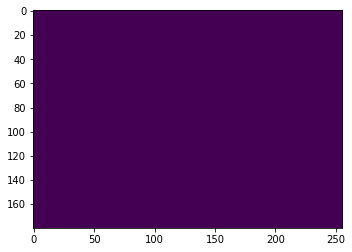

I found 32 white shapes


In [3]:
image = cv2.imread('./MasterOpenCV/Images/chess.jpg')
histogram_contours(image)